# Game Sales Prediction

## Importing Libraries

In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

## Loading and Preprocessing DataFrame

In [2]:
# load the data csv file into pandas dataframe
df = pd.read_csv('games.csv')
# show first five rows of the dataframe
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# show the number of records and attributes in the training dataframe
df.shape

(16719, 16)

In [4]:
# show basic statistics about the dataframe
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
# check if there are any null values in the dataframe
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
# drop some of the least useful columns
df.drop(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis=1, inplace=True)
# show first five rows of the dataframe
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
# remove missing values from the Name column
df.dropna(subset=['Name'], inplace=True)
# check for null values in the dataframe again
df.isna().sum()

Name                 0
Platform             0
Year_of_Release    269
Genre                0
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

In [8]:
# for null values in the column Year_of_Release, replace them with the mean of that column
df['Year_of_Release'].fillna(df['Year_of_Release'].mean(), inplace=True)
# check for null values in the dataframe again
df.isna().sum()

Name                0
Platform            0
Year_of_Release     0
Genre               0
Publisher          54
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
dtype: int64

In [9]:
# change the Year_of_Release column to integer
df['Year_of_Release'] = df['Year_of_Release'].astype('int32')
# show first five rows of the dataframe
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
# replace null values in Publisher column with the most repeated value in that column
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)
# show missing values in the dataframe
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

## Exploratory Data Analysis (EDA)

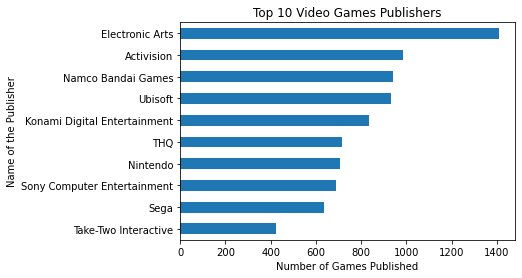

In [11]:
# categorize unique values in Publisher column with the number of times it appeared in the column and sort them
top_10_publishers = df['Publisher'].value_counts().head(10).sort_values()
# create a horizontal bar chart for the above variable
top_10_publishers.plot(kind='barh')
plt.title('Top 10 Video Games Publishers')
plt.xlabel('Number of Games Published')
plt.ylabel('Name of the Publisher')
plt.show()

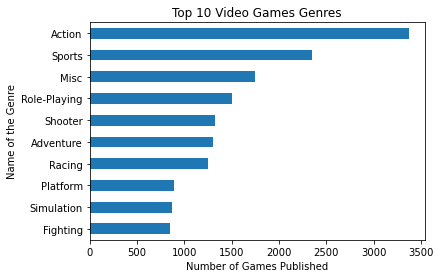

In [12]:
# take unique values in Genre column and the number of times it appeared in the column as a Series
top_10_genres = df['Genre'].value_counts().head(10).sort_values()
# create a horizontal bar chart for the above Series
top_10_genres.plot(kind='barh')
plt.title('Top 10 Video Games Genres')
plt.xlabel('Number of Games Published')
plt.ylabel('Name of the Genre')
plt.show()

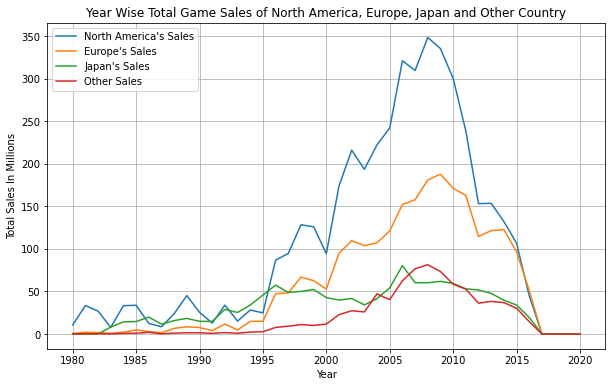

In [13]:
# Create a series of columns: Year_of_Release, NA_Sales, EU_Sales, JP_Sales, Other_Sales grouped by Year_of_Release and their respective sum
year_wise_sales = df.loc[:, ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by = 'Year_of_Release').sum()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting the North America's Sales
plt.plot(year_wise_sales.index, year_wise_sales['NA_Sales'], label="North America's Sales", linestyle='-')

# Plotting Europe's Sales
plt.plot(year_wise_sales.index, year_wise_sales['EU_Sales'], label="Europe's Sales", linestyle='-')

# Plotting Japan's Sales
plt.plot(year_wise_sales.index, year_wise_sales['JP_Sales'], label="Japan's Sales", linestyle='-')

# Plotting Other Sales
plt.plot(year_wise_sales.index, year_wise_sales['Other_Sales'], label="Other Sales", linestyle='-')

plt.title('Year Wise Total Game Sales of North America, Europe, Japan and Other Country')
plt.xlabel('Year')
plt.ylabel('Total Sales In Millions')
plt.legend(loc='best')
plt.grid(True)

plt.show()

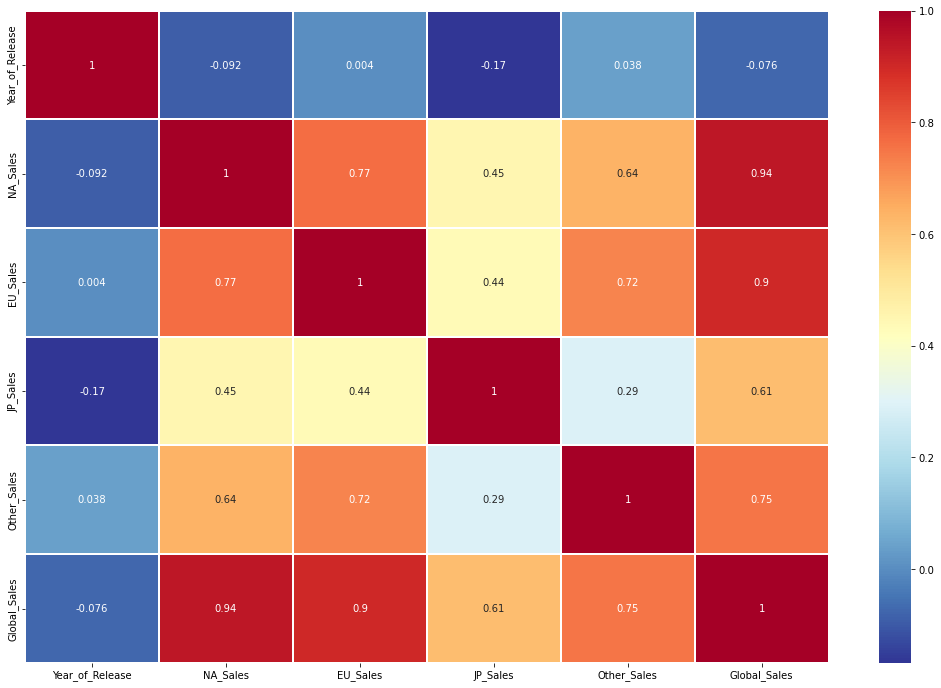

In [14]:
# create correlation dataframe for all the columns in df dataframe
corr_ = df.corr()

plt.figure(figsize=(18, 12))

# create a heatmap to show the intensity of correlation between the columns
sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')

plt.show()

## Training and Evaluating the Models

In [15]:
# create a label encoder object
le = LabelEncoder()

# create a list of columns that has labels and need to be encoded
feature = ["Platform", "Genre"]

# for all columns in the list feature encode its respective values
for col in feature:
    df[col] = le.fit_transform(df[col])

In [16]:
# create target and learning variables for the model
X = df[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = df['Global_Sales'].values

In [17]:
# create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
# show the shape of the training and testing target and learning data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13373, 6), (13373,), (3344, 6), (3344,))

In [18]:
# create Linear Regression model object
lr = LinearRegression()

# fit training data into the model for model learning
lr.fit(X_train, y_train)

# predict values for test data
pred = lr.predict(X_test)

# compare the predicted values with true target values of test data and show regression score
r2_score(y_test,pred)

0.9999864066703127

In [19]:
# create a list of values from 1 to 10
kRange = range(1,10,1)

# create an empty scores list to store ML model scores later
scores_list = []

# iterate over each value in the list
for i in kRange:
    # create a K Nearest Neighbor object with number of neighbors parameter equal to the iterated value from the loop
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    # fit training data to KNN model
    regressor_knn.fit(X_train,y_train)
    # predict test data target values
    pred = regressor_knn.predict(X_test)
    
    # evaluate the KNN model by regression score and store the values in the list created earlier
    scores_list.append(r2_score(y_test,pred))

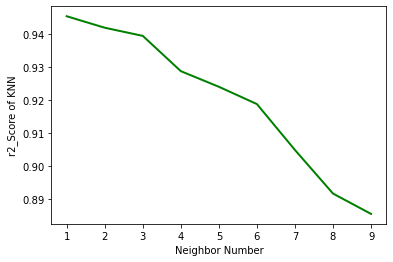

In [20]:
# plot scores list with respect to it's number of nearest neighbors parameter to find out the best parameter value
plt.plot(kRange, scores_list, linewidth=2, color='green')
plt.xticks(kRange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show() 

In [21]:
# create a K Nearest Neighbor object with number of neighbors parameter equal to 3
regressor_knn = KNeighborsRegressor(n_neighbors = 3)
# fit training data to KNN model
regressor_knn.fit(X_train,y_train)
# predict test data target values
pred = regressor_knn.predict(X_test)
# evaluate the KNN model by regression score
r2_score(y_test,pred)

0.9395474640551793